# Scraping insight Data Science fellows data

In this notebook, I'll extract data about insight fellows in order to learn more about past programs fellows and the kind of jobs they obtain after completing the program. I'll use `requests` for obtaining webpages, `Beautiful Soup` for parsing webpages and extracting data and `pandas` for analyzing the data.

### import libraries:

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

### Get web page:

In [2]:
url = 'https://www.insightdatascience.com/fellows'
response = requests.get(url)
response

<Response [200]>

This is the [HTTP response status code](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) that was received. For example: 200 - means succsess and 404 - means not found.

### Extract content:

First, let's look at the entire html structure to understand how it is built and what would we want to extract

In [3]:
content = BeautifulSoup(response.content, 'html.parser')
# print(content.prettify())

In this case there are a lot of fellows and therefore our data is distributed across a few pages. Let's start by extracting the links to all the pages we need:

In [4]:
urls = []
urls.append(url)
a = content.find('a', {'class':'w-pagination-next'})

while a:
    next_url = url + a['href']
    urls.append(next_url)
    r = requests.get(next_url)
    c = BeautifulSoup(r.content, 'html.parser')
    a = c.find('a', {'class':'w-pagination-next'})
    
urls

['https://www.insightdatascience.com/fellows',
 'https://www.insightdatascience.com/fellows?61ea5d1b_page=2',
 'https://www.insightdatascience.com/fellows?61ea5d1b_page=3',
 'https://www.insightdatascience.com/fellows?61ea5d1b_page=4',
 'https://www.insightdatascience.com/fellows?61ea5d1b_page=5',
 'https://www.insightdatascience.com/fellows?61ea5d1b_page=6',
 'https://www.insightdatascience.com/fellows?61ea5d1b_page=7',
 'https://www.insightdatascience.com/fellows?61ea5d1b_page=8']

All the information about each fellow is placed under a `<div>` section of class `fellows_tooltip`, So all we have to do is to find all the `<div class="fellows_tooltip">` sections in each one of the urls and then for each instance append the name, title, company, project, and background of each fellow in to the corresponding list:

In [5]:
# create lists for every data element
fellow_name = []
fellow_title = []
fellow_company = []
fellow_project = []
fellow_background = []

for u in urls:
    r = requests.get(u)
    c = BeautifulSoup(r.content, 'html.parser')
    # find all the fellow tool tips and append each data element to the corresponding list
    for tooltip in c.find_all('div', {'class':'fellows_tooltip'}):
        fellow_name.append(tooltip.find('div', {'class':'tooltip_name'}).text)
        fellow_title.append(tooltip.find('div', {'class':'toottip_title'}).text)
        fellow_company.append(tooltip.find('div', {'class':'tooltip_company'}).text)
        fellow_project.append(tooltip.find('div', {'class':'tooltip_project'}).text)
        fellow_background.append(tooltip.find('div', {'class':'tooltip_background'}).text)

# create a dictionary to hold all the data
data = {'name':fellow_name, 'title':fellow_title, 'company':fellow_company,\
        'project':fellow_project, 'background':fellow_background}

In [6]:
fellow_data = pd.DataFrame(data) # data frame of fellows data
num_fellows = len(fellow_data.index) # total number of fellows 
fellow_data

,name,title,company,project,background
0,JP Bida,Director of Risk,Capital One,Measuring the Impact of Open Source Coders on ...,"Bio-X Games, Stanford, Postdoc"
1,Douglas Mason,Data Scientist,Twitter,Email Searcher: Search & Visualize Your Mailbox,"Physics, Harvard University, PhD\n"
2,Virot Ta Chiraphadhanakul,Data Scientist,Facebook,Tweet Timeline: Visualizing the Impact of Soci...,"Operations Research, MIT, PhD"
3,Julia Viladomat,Data Scientist,Adobe,Sentiment Analysis Based on Social Media,"Statistics, Stanford, Postdoc"
4,David Freeman,Head of Anti-Abuse Engineering,LinkedIn,Flight Delay Predictor,"Mathematics, Stanford, Postdoc"
5,Jessica Zúñiga,Senior Data Scientist,LinkedIn,Email Contacts Automatically Grouped & Ranked,"Mathematics, Duke, Postdoc"
6,Harold Nguyen,Data Scientist,Proofpoint,Analysis of New York Stop-and-Frisk Data,"Physics, UC Riverside, PhD"
7,Sebastien de Larquier,Data Scientist,Netflix,CouchTube: YouTube TV shows in one click,"Space Physics, Virgina Tech, PhD"
8,Paula Therese Lang,Senior Data Scientist,CreativeLIVE,SchoolGeo: Empowering Parents to Make Informed...,"Computational Biology, UC Berkeley, Postdoc"
9,Nan Ma,Data Engineer,Microsoft Yammer,Event Map: Get Local News from Twitter,"Electrical Engineering & Computer Science, UC ..."


How many fellows do we have in this dataset?

In [7]:
num_fellows

794

### Analyze data

Let's explore the background education of the fellows

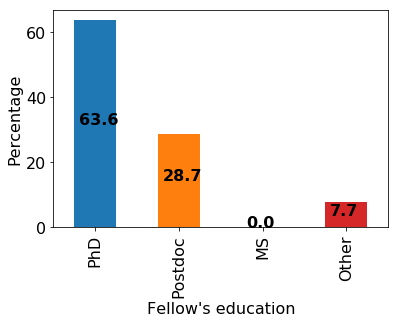

In [8]:
PhD_percentage = 100 * sum(fellow_data['background'].str.contains('PhD'))/num_fellows
Post_percentage = 100 * sum(fellow_data['background'].str.contains('Postdoc'))/num_fellows
MS_percentage = 100 * sum(fellow_data['background'].str.contains('MS'))/num_fellows
other_percentage = 100 - PhD_percentage - MS_percentage - Post_percentage

education = ['PhD', 'Postdoc', 'MS', 'Other']
ed_percentage = [PhD_percentage, Post_percentage, MS_percentage, other_percentage]
fellows_education = pd.Series(data= ed_percentage, index= education)


plt.figure()
plt.rcParams.update({'font.size': 16})
fellows_education.plot('bar')
plt.xlabel('Fellow\'s education')
plt.ylabel('Percentage')
for i,v in enumerate(fellows_education):
    plt.text(i -.2, v/2, str(round(v,1)), fontweight = 'bold')

We have 7.7% which are not PhD, Postdocs or MS. Let's check their background:

In [9]:
pd.set_option('display.max_colwidth', -1)
fellow_data[~(fellow_data['background'].str.contains('PhD') | fellow_data['background'].str.contains('Postdoc'))].background

42     Probability Theory and Stochastic Processes,                                                                
106    Civil Engineering, Geophysics, Caltech/California Institute of Technology                                   
132    Systems Neuroscience, Weill Cornell Medical College, Faculty                                                
133    Astrophysics, Niels Bohr Institute, Copenhagen University, Faculty                                          
182    Physics, Stanford, Systems Engineer                                                                         
186    Astrophysics, Penn State, Adjunct Faculty                                                                   
201    Physics, Lawrence Berkeley National Lab Scientist                                                           
263    High Energy Particle Physics, California Polytechnic State University, Lecturer                             
265    High Performance Computing, University of Chicago, Staff         

#### What fields of in the academia are they coming from?

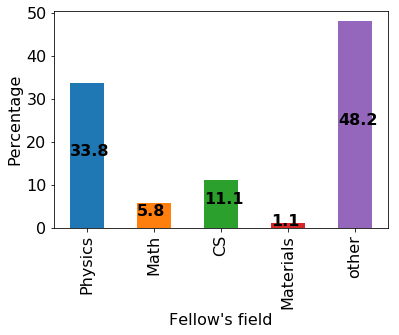

In [10]:
Physics = 100 * sum(fellow_data['background'].str.contains('Physics')\
                    | fellow_data['background'].str.contains('Astrophysics')\
                    | fellow_data['background'].str.contains('Astronomy'))/num_fellows
Math = 100 * sum(fellow_data['background'].str.contains('Mathematics'))/num_fellows
CS = 100 * sum(fellow_data['background'].str.contains('Computer') \
               | fellow_data['background'].str.contains('Computational'))/num_fellows
Materials = 100 * sum(fellow_data['background'].str.contains('Materials'))/num_fellows
other = 100 - (Physics + Math + CS + Materials)

edu_field = ['Physics', 'Math', 'CS', 'Materials', 'other']
field_percentage = [Physics, Math, CS, Materials, other]
fellows_field = pd.Series(field_percentage, index = edu_field)

plt.figure()
plt.rcParams.update({'font.size': 16})
fellows_field.plot('bar')
plt.xlabel('Fellow\'s field')
plt.ylabel('Percentage')
for i,v in enumerate(fellows_field):
    plt.text(i -.25, v/2, str(round(v,1)), fontweight = 'bold')

#### What are the most common companies for fellows to work for after the program?

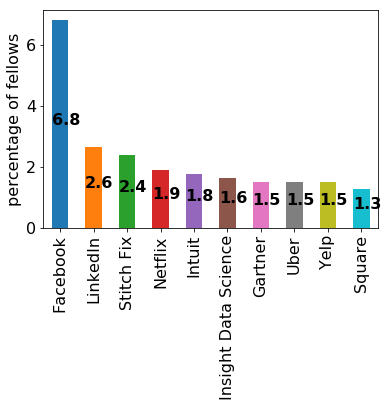

In [11]:
companies = fellow_data.company.value_counts()
companies_per = 100*companies.head(10)/num_fellows # show percentage for top 10 companies
companies_per.plot('bar')
 
plt.ylabel('percentage of fellows')
for i,v in enumerate(companies_per):
    plt.text(i -.25, v/2, str(round(v,1)), fontweight = 'bold')

#### What are the most common titles of fellows after the program?

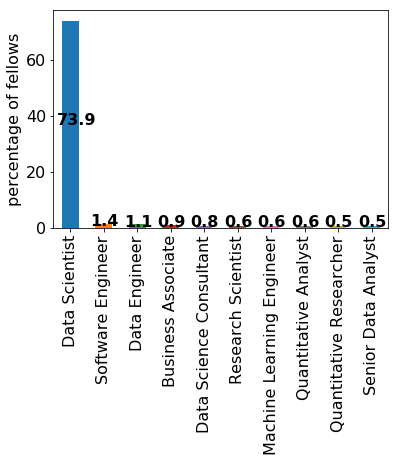

In [62]:
# Clean titles and merge similar titles
clean_titles = fellow_data.title
clean_titles.values[clean_titles.str.contains('Data Scientist').tolist()] = 'Data Scientist'
titles = clean_titles.value_counts()

# take 10 most popular titles and convert to percentage
titles_per = 100*titles.head(10)/num_fellows
titles_per.plot('bar')
plt.ylabel('percentage of fellows')
for i,v in enumerate(titles_per):
    plt.text(i -.4, v/2, str(round(v,1)), fontweight = 'bold')